In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'c:\Users\dalej\Programming\UN Dathaton\hogares__proyeccion__2018.csv',encoding = "latin-1")

In [3]:
dfT = df.T

In [5]:
years = [2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
dictcomunas = {}
for i,comuna in df.iterrows():
    valuesyear = comuna[['i2018','i2019','i2020','i2021','i2022','i2023',
                         'i2024','i2025','i2026','i2027','i2028','i2029','i2030']].to_list()
    dictcomunas[comuna['codigo']] = valuesyear

In [6]:
dictcomunas["years"] = years

In [7]:
newdf = pd.DataFrame.from_dict(
    dictcomunas
)

newdf.set_index('years',inplace=True)

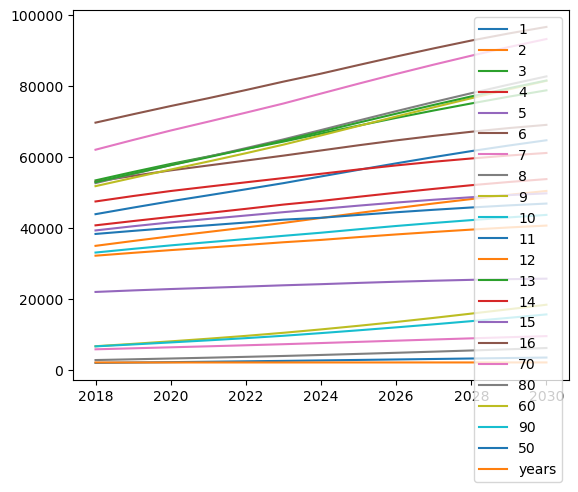

In [85]:
for comuna in dictcomunas.keys():
    plt.plot(years,dictcomunas[comuna],label=comuna)
plt.legend()

In [9]:
newdf.to_csv("ProyeccionHogares.csv")

In [86]:
comunasslopes = {}
for comuna in dictcomunas.keys():
    if comuna == "years":
        continue
    area = df[df["codigo"] == comuna]["Shape_Area"].values[0]
    slope = np.diff(np.array(dictcomunas[comuna])).mean()
    comunasslopes[comuna] = slope

In [87]:
import geopandas as gpd
geo_df = gpd.read_file("comunas_y_corregimientos.geojson")
geo_df = geo_df.drop([19,21],axis = 0)
geo_df = geo_df.astype({"codigo":"int64"})

In [88]:
geo_df.set_index("codigo",inplace=True)

In [89]:
slopesdf = pd.DataFrame.from_dict(comunasslopes,orient="index",columns=["Slope"]).reset_index().rename(columns={"index":"codigo"}).set_index("codigo")

In [90]:
geo_df = geo_df.join(slopesdf)

In [91]:
geo_df.drop(index = [50,60,70,80,90],inplace=True)

<Axes: >

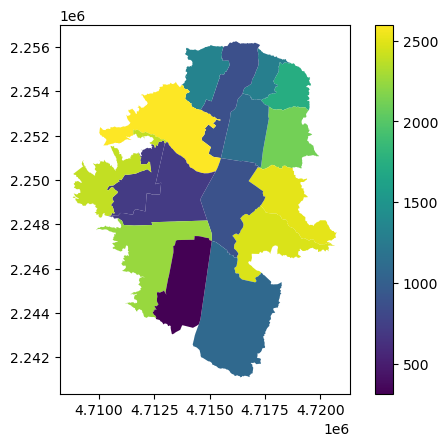

In [92]:
geo_df.plot(column='Slope',legend=True)